# https://www.kaggle.com/c/kaggle-pog-series-s01e01/overview

### objective: The task of this competition is to predict the 'like to view_count ratio' of youtube videos based on the title, description, thumbnail and additional metadata. You are free to use all data provided, however do not use external data for training your models.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

for directory,_,filenames in os.walk('data/'):
    for filename in filenames:
        print(os.path.join(directory,filename))

data/data.parquet
data/train.parquet
data/test.parquet
data/data.csv


In [2]:
train = pd.read_parquet('data/train.parquet')
test = pd.read_parquet('data/test.parquet')


In [3]:
train.shape

(92275, 20)

In [4]:
test.shape

(5800, 16)

In [5]:
set(train.columns) - set(test.columns)

{'comment_count', 'dislikes', 'likes', 'target', 'view_count'}

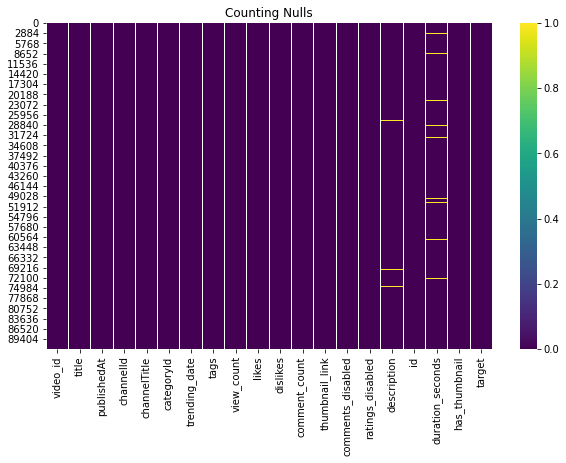

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(train.isna(),cmap='viridis' )
plt.title('Counting Nulls')
plt.show()

In [7]:
train.isna().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          1476
id                      0
duration_seconds     2176
has_thumbnail           0
target                  0
dtype: int64

In [8]:
for i in train.columns:
    if train[i].isna().sum() > 0:
        print(i, train[i].isna().sum(),train[i].isna().sum()/train.shape[0])

description 1476 0.015995665131400705
duration_seconds 2176 0.023581685180167976


In [9]:
train = train.dropna()

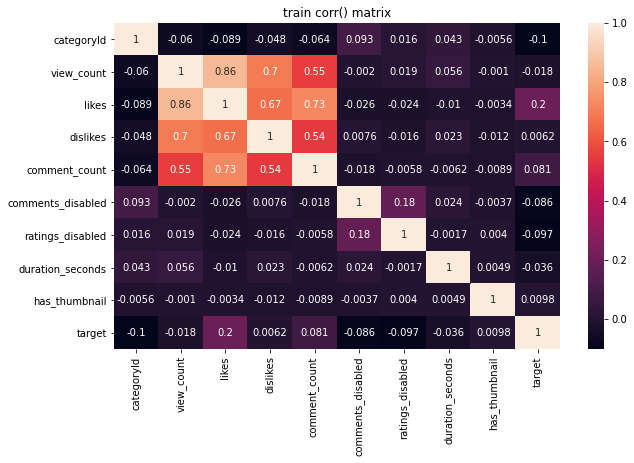

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(), annot=True)
plt.title('train corr() matrix')
plt.show()

In [11]:
#sns.pairplot(train)

In [12]:
train.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
40,n_8hxS_7Vis,Shannon reacts to Kyle Kuzma's game-winning sh...,2020-08-11 16:21:47+00:00,UCLXzq85ijg2LwJWFrz4pkmw,Skip and Shannon: UNDISPUTED,17,2020-08-12,fox|fox sports|fs1|fox sports 1|undisputed|ski...,540613,7155,308,1647,https://i.ytimg.com/vi/n_8hxS_7Vis/default.jpg,False,False,LeBron and the Lakers finally snapped their 3-...,n_8hxS_7Vis_2020-08-12,1112.0,True,0.013235
41,OQZ5ht79nEw,Answering Your Assumptions About Us... Merrell...,2020-08-11 17:29:52+00:00,UCwtnkRZcvL4bfopzJ-Von8Q,merrelltwins,23,2020-08-12,Merrell Twins|Twins|Merrell|Veronica Merrell|V...,430836,37754,256,4818,https://i.ytimg.com/vi/OQZ5ht79nEw/default.jpg,False,False,We answered your assumptions about us...Go to ...,OQZ5ht79nEw_2020-08-12,1083.0,True,0.087630


In [13]:
test.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,isTest
0,_wNsZEqpKUA,"Billie Eilish: Same Interview, The Fifth Year ...",2021-11-30 17:00:10+00:00,UCIsbLox_y9dCIMLd8tdC6qg,Vanity Fair,24,2021-12-01,billie|billie eilish|billie eilish 2021|billie...,https://i.ytimg.com/vi/_wNsZEqpKUA/default.jpg,False,False,I'm so much more open to stuff now. On the ver...,_wNsZEqpKUA_2021-12-01,1335.0,True,True
1,2jfbXZiE6Lc,Redneck vs Fancy Whiskey Glass,2021-11-29 21:30:27+00:00,UCT_QEGH0myu6lgbE_biQPuw,Drew Talbert,23,2021-12-01,[None],https://i.ytimg.com/vi/2jfbXZiE6Lc/default.jpg,False,False,I’m just shocked Brad was able to sell him in ...,2jfbXZiE6Lc_2021-12-01,28.0,True,True


In [14]:
list(set(train.columns) - set(test.columns))

['likes', 'target', 'dislikes', 'comment_count', 'view_count']

In [15]:
train2 = train.drop(['view_count', 'dislikes', 'likes', 'comment_count', 'target'],1)

In [16]:
data = pd.concat([train2,test])

In [17]:
data.isna().sum()

video_id                 0
title                    0
publishedAt              0
channelId                0
channelTitle             0
categoryId               0
trending_date            0
tags                     0
thumbnail_link           0
comments_disabled        0
ratings_disabled         0
description            409
id                       0
duration_seconds        20
has_thumbnail            0
isTest               88685
dtype: int64

In [18]:
data['isTest'] = data['isTest'].fillna(False)

In [19]:
data.isna().sum()

video_id               0
title                  0
publishedAt            0
channelId              0
channelTitle           0
categoryId             0
trending_date          0
tags                   0
thumbnail_link         0
comments_disabled      0
ratings_disabled       0
description          409
id                     0
duration_seconds      20
has_thumbnail          0
isTest                 0
dtype: int64

In [20]:
data = data.dropna()

In [21]:
data.describe()

,categoryId,duration_seconds
count,94060.000000,94060.000000
mean,18.709760,764.622773
std,6.866342,5694.713253
min,1.000000,3.000000
25%,17.000000,186.000000
50%,20.000000,467.000000
75%,24.000000,865.000000
max,29.000000,485620.000000


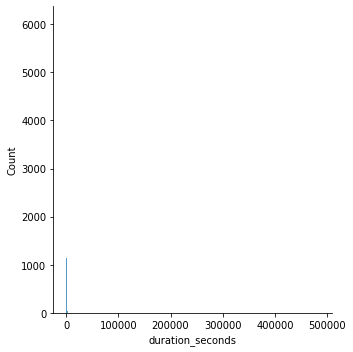

In [22]:
sns.displot(data=data,x='duration_seconds')

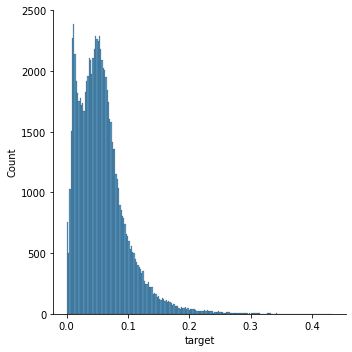

In [23]:
sns.displot(data=train,x='target')

In [24]:
def outliers_duration(data,feature='duration_seconds'):
    q1 = data[feature].quantile(.25)
    q3 = data[feature].quantile(.75)

    IQR = q3 - q1 
    IQR *= 1.5

    min_dur = q1- IQR
    max_dur = q3 + IQR

    return data[(data[feature] >= min_dur) & (data[feature] <= max_dur)]

In [25]:
data = outliers_duration(data)
train = outliers_duration(train)

<Figure size 864x432 with 0 Axes>

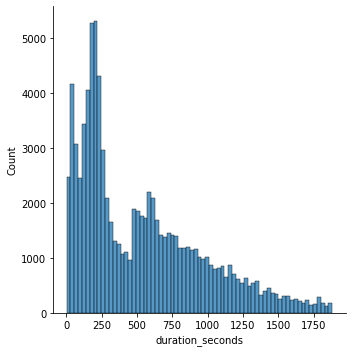

In [26]:
plt.figure(figsize=(12,6))
sns.displot(data=data,x='duration_seconds')
plt.show()

## lets investigate the Training data

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84998 entries, 40 to 92274
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           84998 non-null  object             
 1   title              84998 non-null  object             
 2   publishedAt        84998 non-null  datetime64[ns, UTC]
 3   channelId          84998 non-null  object             
 4   channelTitle       84998 non-null  object             
 5   categoryId         84998 non-null  int64              
 6   trending_date      84998 non-null  object             
 7   tags               84998 non-null  object             
 8   view_count         84998 non-null  int64              
 9   likes              84998 non-null  int64              
 10  dislikes           84998 non-null  int64              
 11  comment_count      84998 non-null  int64              
 12  thumbnail_link     84998 non-null  object    

In [28]:
def convert_date(data,feature='publishedAt'):
    data[feature] = pd.to_datetime(data[feature],utc=True)
    data[feature +'_month'] = data[feature].dt.month
    data[feature + '_year'] = data[feature].dt.year
    data[feature + '_day'] = data[feature].dt.day
    
    return data
    

In [29]:
#train['publishedAt'] = pd.to_datetime(train['publishedAt'])

In [30]:
# train['publishedAt_month'] = train['publishedAt'].dt.month
# train['publishedAt_year'] = train['publishedAt'].dt.year
# train['publishedAt_day'] = train['publishedAt'].dt.day

In [31]:
# train['trending_date'] = pd.to_datetime(train['trending_date'])

In [32]:
# train['trending_date_month'] = train['trending_date'].dt.month
# train['trending_date_year'] = train['trending_date'].dt.year
# train['trending_date_day'] = train['trending_date'].dt.day

In [33]:
train = convert_date(train)
train = convert_date(train,'trending_date')

In [34]:
data = convert_date(data)
data = convert_date(data,'trending_date')

In [35]:
train.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,id,duration_seconds,has_thumbnail,target,publishedAt_month,publishedAt_year,publishedAt_day,trending_date_month,trending_date_year,trending_date_day
40,n_8hxS_7Vis,Shannon reacts to Kyle Kuzma's game-winning sh...,2020-08-11 16:21:47+00:00,UCLXzq85ijg2LwJWFrz4pkmw,Skip and Shannon: UNDISPUTED,17,2020-08-12 00:00:00+00:00,fox|fox sports|fs1|fox sports 1|undisputed|ski...,540613,7155,...,n_8hxS_7Vis_2020-08-12,1112.0,True,0.013235,8,2020,11,8,2020,12
41,OQZ5ht79nEw,Answering Your Assumptions About Us... Merrell...,2020-08-11 17:29:52+00:00,UCwtnkRZcvL4bfopzJ-Von8Q,merrelltwins,23,2020-08-12 00:00:00+00:00,Merrell Twins|Twins|Merrell|Veronica Merrell|V...,430836,37754,...,OQZ5ht79nEw_2020-08-12,1083.0,True,0.087630,8,2020,11,8,2020,12


<Figure size 864x432 with 0 Axes>

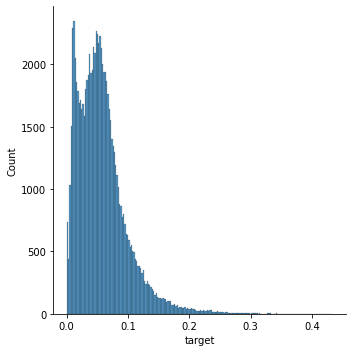

In [36]:
plt.figure(figsize=(12,6))
sns.displot(data=train,x='target')
plt.show()

<AxesSubplot:>

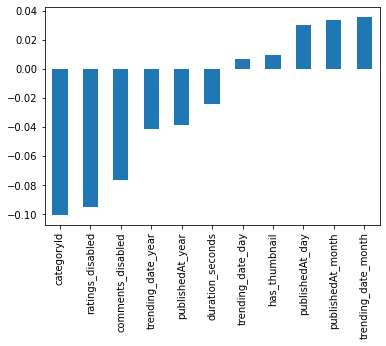

In [37]:
train.drop(['likes','view_count','dislikes','comment_count'],1).corr()['target'].sort_values()[0:-1].plot.bar()

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84998 entries, 40 to 92274
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   video_id             84998 non-null  object             
 1   title                84998 non-null  object             
 2   publishedAt          84998 non-null  datetime64[ns, UTC]
 3   channelId            84998 non-null  object             
 4   channelTitle         84998 non-null  object             
 5   categoryId           84998 non-null  int64              
 6   trending_date        84998 non-null  datetime64[ns, UTC]
 7   tags                 84998 non-null  object             
 8   view_count           84998 non-null  int64              
 9   likes                84998 non-null  int64              
 10  dislikes             84998 non-null  int64              
 11  comment_count        84998 non-null  int64              
 12  thumbnail_link   

In [39]:
train['pub_to_trend_mins'] = (train['trending_date'] - train['publishedAt']).astype('timedelta64[m]')
data['pub_to_trend_mins'] = (data['trending_date'] - data['publishedAt']).astype('timedelta64[m]')

In [40]:
train[['trending_date','publishedAt','pub_to_trend_mins']]

,trending_date,publishedAt,pub_to_trend_mins
40,2020-08-12 00:00:00+00:00,2020-08-11 16:21:47+00:00,458.0
41,2020-08-12 00:00:00+00:00,2020-08-11 17:29:52+00:00,390.0
42,2020-08-12 00:00:00+00:00,2020-08-11 14:42:43+00:00,557.0
43,2020-08-12 00:00:00+00:00,2020-08-12 02:30:32+00:00,-151.0
44,2020-08-12 00:00:00+00:00,2020-08-11 02:40:01+00:00,1279.0
...,...,...,...
92268,2021-11-30 00:00:00+00:00,2021-11-24 14:00:04+00:00,7799.0
92269,2021-11-30 00:00:00+00:00,2021-10-24 21:06:53+00:00,52013.0
92270,2021-11-30 00:00:00+00:00,2021-11-23 19:13:46+00:00,8926.0
92272,2021-11-30 00:00:00+00:00,2021-11-23 22:50:19+00:00,8709.0


In [41]:
data['publishedAt_year'].describe()

count    90130.000000
mean      2020.708310
std          0.454543
min       2020.000000
25%       2020.000000
50%       2021.000000
75%       2021.000000
max       2021.000000
Name: publishedAt_year, dtype: float64

In [42]:
train['pub_to_trend_mins'].describe()

count    84998.000000
mean      4924.809431
std       3333.964364
min       -841.000000
25%       2561.250000
50%       4721.000000
75%       7037.000000
max      52013.000000
Name: pub_to_trend_mins, dtype: float64

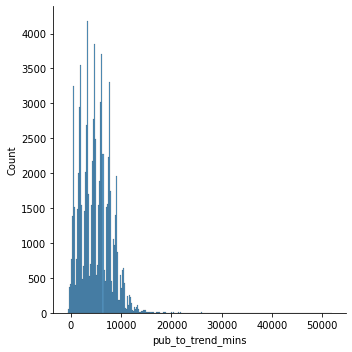

In [43]:
sns.displot(data=train,x='pub_to_trend_mins')

In [44]:
train[train['pub_to_trend_mins']< 5].shape[0]

960

In [45]:
def outlier_pubTrend(data,feature='pub_to_trend_mins'):
    q1 = data[feature].quantile(.25)
    q3 = data[feature].quantile(.75)

    IQR = q3 - q1 
    IQR *= 1.5

    min_dur = 5
    max_dur = q3 + IQR

    return data[(data['pub_to_trend_mins'] >= min_dur) & (data['pub_to_trend_mins'] <= max_dur)]


In [46]:
train = outlier_pubTrend(train)
data = outlier_pubTrend(data)

In [47]:
train['pub_to_trend_mins'].describe()

count    83400.000000
mean      4850.944676
std       2835.041760
min          5.000000
25%       2639.000000
50%       4734.000000
75%       6988.000000
max      13745.000000
Name: pub_to_trend_mins, dtype: float64

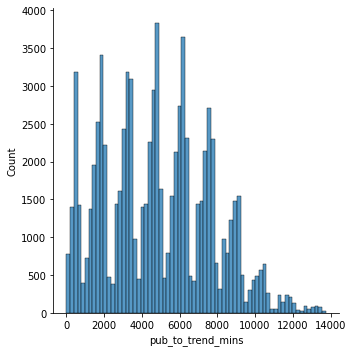

In [48]:
sns.displot(data=train,x='pub_to_trend_mins')

In [49]:
# plt.figure(figsize=(16,8))
# sns.scatterplot(data=train_temp,x='pub_to_trend_mins',y='likes')
# plt.title('pub_to_trend vs likes')
# plt.show()

In [51]:
# plt.figure(figsize=(16,8))
# sns.scatterplot(data=train_temp,x='pub_to_trend_mins',y='view_count')
# plt.title('pub_to_trend vs view_count')
# plt.show()

In [52]:
# plt.figure(figsize=(16,8))
# sns.scatterplot(data=train_temp,x='pub_to_trend_mins',y='target')
# plt.title('pub_to_trend vs likes')
# plt.show()

In [53]:
data['tags_amount'] = data['tags'].apply(lambda x: len(x.split('|')))
train['tags_amount'] = train['tags'].apply(lambda x: len(x.split('|')))

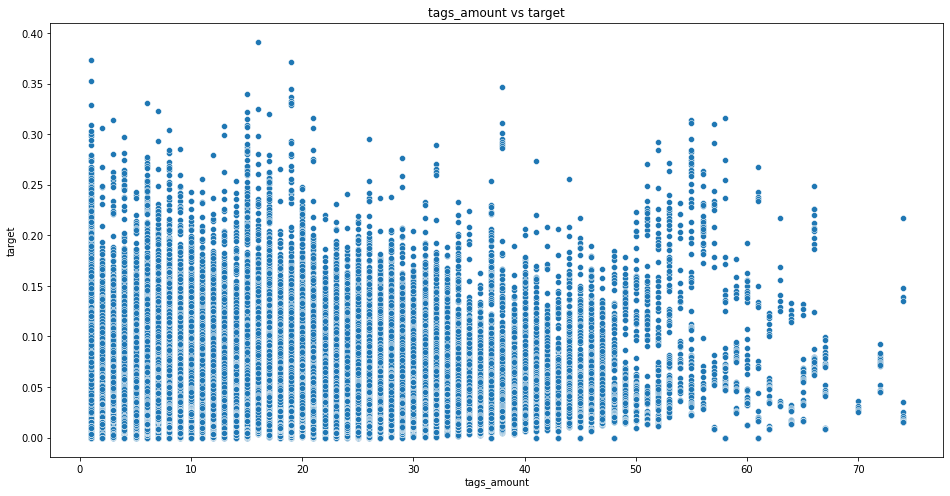

In [54]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=train,x='tags_amount',y='target')
plt.title('tags_amount vs target')
plt.show()

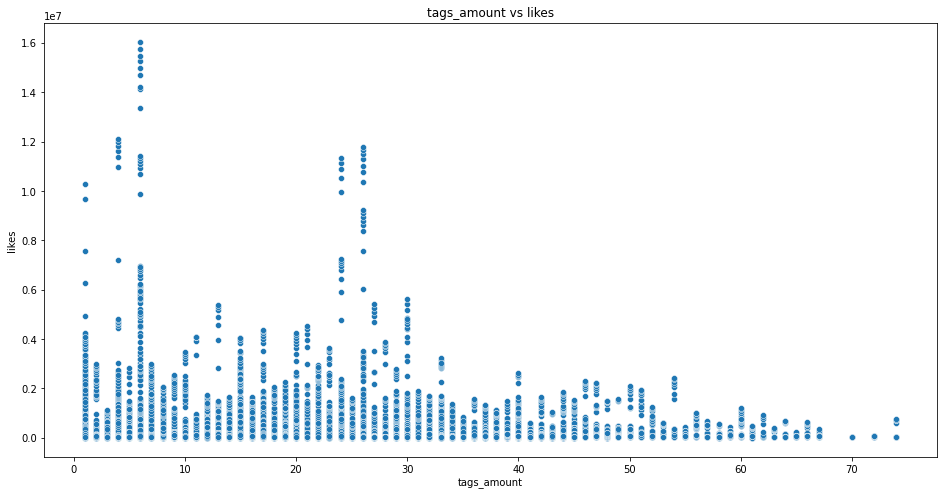

In [55]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=train,x='tags_amount',y='likes')
plt.title('tags_amount vs likes')
plt.show()

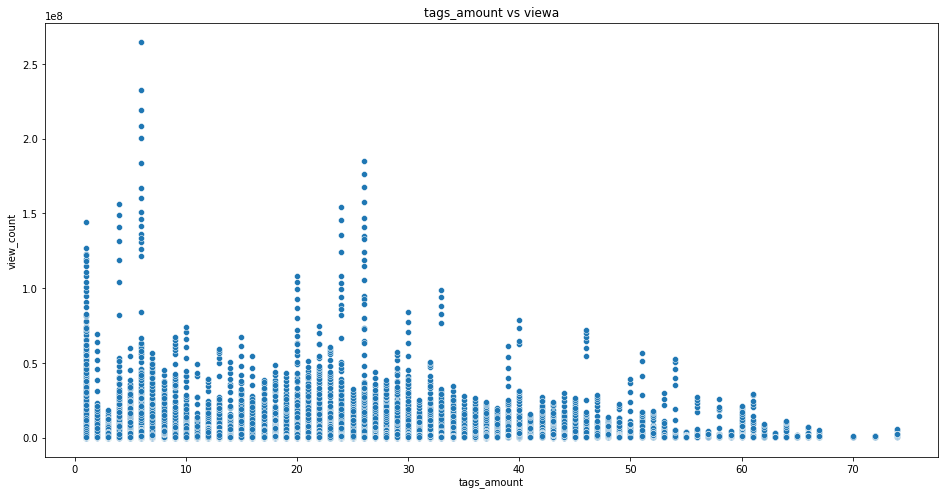

In [56]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=train,x='tags_amount',y='view_count')
plt.title('tags_amount vs viewa')
plt.show()

In [57]:
data.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,thumbnail_link,comments_disabled,...,has_thumbnail,isTest,publishedAt_month,publishedAt_year,publishedAt_day,trending_date_month,trending_date_year,trending_date_day,pub_to_trend_mins,tags_amount
40,n_8hxS_7Vis,Shannon reacts to Kyle Kuzma's game-winning sh...,2020-08-11 16:21:47+00:00,UCLXzq85ijg2LwJWFrz4pkmw,Skip and Shannon: UNDISPUTED,17,2020-08-12 00:00:00+00:00,fox|fox sports|fs1|fox sports 1|undisputed|ski...,https://i.ytimg.com/vi/n_8hxS_7Vis/default.jpg,False,...,True,False,8,2020,11,8,2020,12,458.0,42
41,OQZ5ht79nEw,Answering Your Assumptions About Us... Merrell...,2020-08-11 17:29:52+00:00,UCwtnkRZcvL4bfopzJ-Von8Q,merrelltwins,23,2020-08-12 00:00:00+00:00,Merrell Twins|Twins|Merrell|Veronica Merrell|V...,https://i.ytimg.com/vi/OQZ5ht79nEw/default.jpg,False,...,True,False,8,2020,11,8,2020,12,390.0,17


In [58]:
data['description_len'] = data['description'].apply(lambda x: len(x.split()))
train['description_len'] = train['description'].apply(lambda x: len(x.split()))

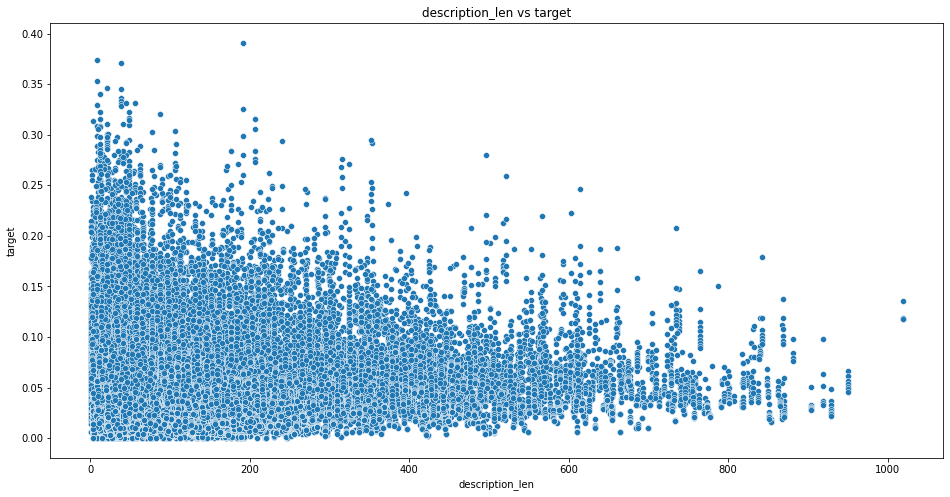

In [59]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=train,x='description_len',y='target')
plt.title('description_len vs target')
plt.show()

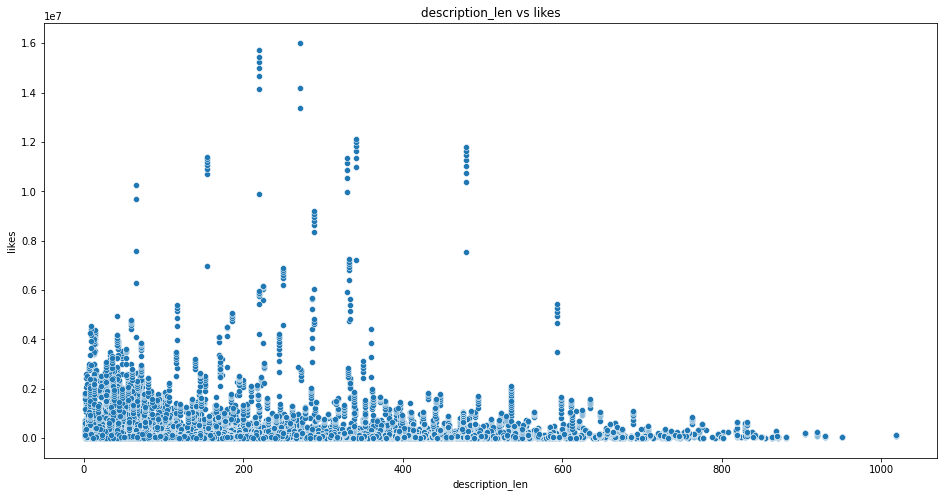

In [60]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=train,x='description_len',y='likes')
plt.title('description_len vs likes')
plt.show()

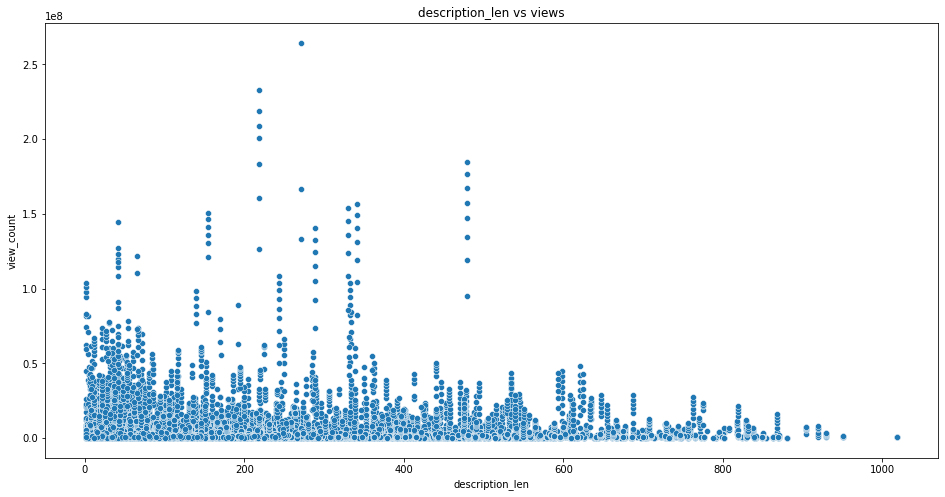

In [61]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=train,x='description_len',y='view_count')
plt.title('description_len vs views')
plt.show()

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83400 entries, 40 to 92274
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   video_id             83400 non-null  object             
 1   title                83400 non-null  object             
 2   publishedAt          83400 non-null  datetime64[ns, UTC]
 3   channelId            83400 non-null  object             
 4   channelTitle         83400 non-null  object             
 5   categoryId           83400 non-null  int64              
 6   trending_date        83400 non-null  datetime64[ns, UTC]
 7   tags                 83400 non-null  object             
 8   view_count           83400 non-null  int64              
 9   likes                83400 non-null  int64              
 10  dislikes             83400 non-null  int64              
 11  comment_count        83400 non-null  int64              
 12  thumbnail_link   

In [63]:
[x for x in data.columns if data[x].dtype == 'bool']

['comments_disabled', 'ratings_disabled', 'has_thumbnail', 'isTest']

In [64]:
for i in ['comments_disabled', 'ratings_disabled', 'has_thumbnail']:
    data[i] = np.where(data[i] == True,1,0)
    train[i] = np.where(train[i] == True,1,0)

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83400 entries, 40 to 92274
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   video_id             83400 non-null  object             
 1   title                83400 non-null  object             
 2   publishedAt          83400 non-null  datetime64[ns, UTC]
 3   channelId            83400 non-null  object             
 4   channelTitle         83400 non-null  object             
 5   categoryId           83400 non-null  int64              
 6   trending_date        83400 non-null  datetime64[ns, UTC]
 7   tags                 83400 non-null  object             
 8   view_count           83400 non-null  int64              
 9   likes                83400 non-null  int64              
 10  dislikes             83400 non-null  int64              
 11  comment_count        83400 non-null  int64              
 12  thumbnail_link   

In [66]:
train1 = train[[x for x in train.columns if train[x].dtype == 'int' or train[x].dtype == 'float']].copy()
train1 = train1.drop(['likes','dislikes','comment_count','view_count'],1)
train1['target'] = train['target']

In [67]:
df = train1.copy()

In [68]:
df.head(3)

,categoryId,comments_disabled,ratings_disabled,duration_seconds,has_thumbnail,target,publishedAt_month,publishedAt_year,publishedAt_day,trending_date_month,trending_date_year,trending_date_day,pub_to_trend_mins,tags_amount,description_len
40,17,0,0,1112.0,1,0.013235,8,2020,11,8,2020,12,458.0,42,239
41,23,0,0,1083.0,1,0.087630,8,2020,11,8,2020,12,390.0,17,70
42,28,0,0,438.0,0,0.061170,8,2020,11,8,2020,12,557.0,15,16


In [69]:
X = df.drop('target',1).values
y = df['target'].values

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [72]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [73]:
scaler = StandardScaler()

In [74]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score


********** LinearRegression() **********
MSE: 0.0014855793843793583
SRMSE: 0.03854321450501188
MAE: 0.028580549730106777
r2: 0.05984408971513788


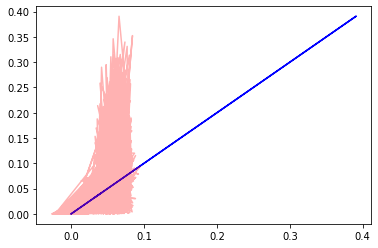

********************
********** Ridge() **********
MSE: 0.0014878830155804152
SRMSE: 0.03857308667426571
MAE: 0.028605049627274247
r2: 0.05838622585975384


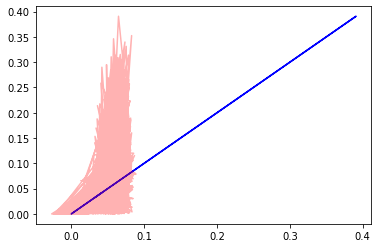

********************
********** Lasso() **********
MSE: 0.0015801792674204802
SRMSE: 0.0397514687454499
MAE: 0.029541549730877182
r2: -2.3891820243981954e-05


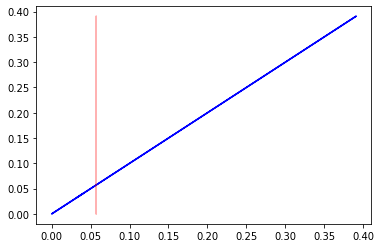

********************
********** AdaBoostRegressor() **********
MSE: 0.002140296997534286
SRMSE: 0.046263343994293
MAE: 0.03825020876689555
r2: -0.3544970354024275


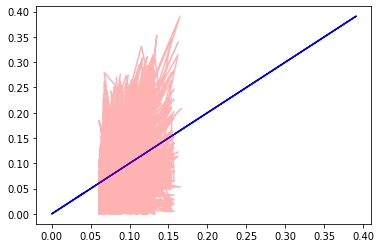

********************
********** DecisionTreeRegressor() **********
MSE: 0.0009761141467704097
SRMSE: 0.031242825524757035
MAE: 0.015032727513868032
r2: 0.3822615648491513


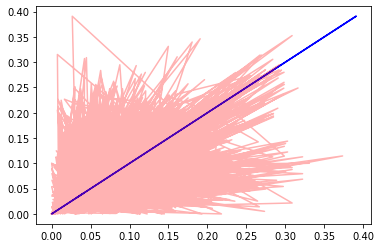

********************
********** RandomForestRegressor() **********
MSE: 0.0004869978724648377
SRMSE: 0.022068028286750897
MAE: 0.013111226136818485
r2: 0.6918011027157247


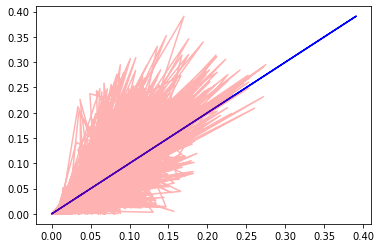

********************


In [76]:
models = [LinearRegression(),Ridge(),Lasso(),AdaBoostRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print('*'*10,model,'*'*10)
    print(f'MSE: {mean_squared_error(y_test,pred)}')
    print(f'SRMSE: {np.sqrt(mean_squared_error(y_test,pred))}')
    print(f'MAE: {mean_absolute_error(y_test,pred)}')
    print(f'r2: {r2_score(y_test,pred)}')
    
    df_res = pd.DataFrame()
    df_res['actual'] = y_test
    df_res['pred'] = pred
    df_res['MSE'] = mean_squared_error(y_test,pred)
    df_res['error'] = y_test - pred
    
    plt.plot(df_res['actual'],df_res['actual'],'b',alpha=1)
    plt.plot(df_res['pred'],df_res['actual'],'r',alpha=0.3)
    plt.show()
    print('*'*20)




In [77]:
# lets hypertune the random forest

In [78]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [79]:

model = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 64.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 168.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [81]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_train, y_train)


Model Performance
Average Error: 0.0055 degrees.
Accuracy = nan%.


<ipython-input-81-a5f4e3aac91d>:4: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)
<ipython-input-81-a5f4e3aac91d>:4: RuntimeWarning: invalid value encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)


In [83]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_train, y_train)


Model Performance
Average Error: 0.0000 degrees.
Accuracy = nan%.


<ipython-input-81-a5f4e3aac91d>:4: RuntimeWarning: invalid value encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [ ]:
#model = RandomForestRegressor()